
# Project: House Price Prediction

## Table of Contents
* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Insights from Exploratoty Analysis
* Training and Evaluation of Regression Modles
* Making Predictions with Test Data
* Conclusions

## Introduction

> In this project we aim to use machine learning regression algorithms to predict house prices. We will be training with a dataset that contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

In [57]:
# importing necessary libraries
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Data Wrangling

> In this section we will import our dataset and examine it's features. We will also carry out feature engineering and data cleaning if it is necessary.

### General Properties

In [58]:
# Loading our test and train datasets
pd.set_option('display.max_columns', None) # make pandas display all columns
pd.set_option('display.max_rows', None)
df_train = pd.read_csv('house_price_prediction_train.csv')
df_test = pd.read_csv('house_price_prediction_test.csv')

In [59]:
# puting column names in lowercase
df_train.columns = [x.lower() for x in df_train.columns]
df_test.columns = [x.lower() for x in df_test.columns]

In [60]:
# inpecting our train data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [61]:
# checking for percentage of missing values in columns
df_train.isna().sum()/len(df_train)*100

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
bsmtqual          2.534247
bsmtcond          2.534247
bsmtexposure      2.602740
bsmtfintype1      2.534247
bsmtfinsf1        0.000000
bsmtfintype2      2.602740
bsmtfinsf2        0.000000
b

In [62]:
#checking for the percentage of missing values in the test data
df_test.isna().sum()/len(df_test)*100

id                0.000000
mssubclass        0.000000
mszoning          0.274160
lotfrontage      15.558602
lotarea           0.000000
street            0.000000
alley            92.666210
lotshape          0.000000
landcontour       0.000000
utilities         0.137080
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.068540
exterior2nd       0.068540
masvnrtype        1.096642
masvnrarea        1.028101
exterqual         0.000000
extercond         0.000000
foundation        0.000000
bsmtqual          3.015764
bsmtcond          3.084304
bsmtexposure      3.015764
bsmtfintype1      2.878684
bsmtfinsf1        0.068540
bsmtfintype2      2.878684
bsmtfinsf2        0.068540
b

### Handeling Missing Data

In [63]:
# from the data description we know null values have no alley access
df_train['alley'].fillna('No Alley',inplace=True) 
df_test['alley'].fillna('No Alley',inplace=True)

In [64]:
# filling masvnrtype and masvnrarea with mode and average values respectively
train_mode = df_train.masvnrtype.value_counts().index[0]
train_mean = df_train.masvnrarea.mean()
test_mean = df_test.masvnrtype.value_counts().index[0]
test_mode = df_test.masvnrarea.mean()
df_train['masvnrtype'].fillna(train_mode,inplace=True)
df_train['masvnrarea'].fillna(train_mean,inplace=True)
df_test['masvnrtype'].fillna(test_mode,inplace=True)
df_test['masvnrarea'].fillna(test_mean,inplace=True)

In [65]:
#filling null values in basement columns with not available
basement_cols = ['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2','bsmtfinsf1','bsmtfinsf2','totalbsmtsf',
                'bsmtfullbath','bsmthalfbath','bsmtunfsf']
for i in basement_cols:
    df_train[i].fillna('No Basement',inplace=True)
    df_test[i].fillna('No Basement',inplace=True)

In [66]:
# dropping columns with over 40% of missing data in the training data
drop = ['fireplacequ','poolqc','fence','miscfeature']
df_train = df_train.drop(drop,axis=1)
df_test = df_test.drop(drop,axis=1)

In [67]:
# filling the null values in the electrical column with the mode of the column
mode = df_train.electrical.value_counts().head(1).index[0]
df_train['electrical'].fillna(mode,inplace=True)

In [68]:
# handling missing data in the garage columns, replacing null values with mode
garage_cols = ('garagetype','garageyrblt','garagefinish','garagecars','garagearea','garagequal','garagecond')
for i in garage_cols:
    df_train[i].fillna(df_train[i].value_counts().head(1).index[0],inplace=True)
    df_test[i].fillna(df_test[i].value_counts().head(1).index[0],inplace=True)

In [69]:
# filling the null values in mszoning, utilities, exterior1st and exterior2nd columns
for i in ('mszoning', 'utilities', 'exterior1st', 'exterior2nd','kitchenqual','functional','saletype'):
    df_test[i].fillna(df_test[i].value_counts().head(1).index[0],inplace=True)

In [70]:
# filling lotfrontage values with the mean 
train_mean = df_train.lotfrontage.mean()
test_mean = df_test.lotfrontage.mean()
df_train['lotfrontage'].fillna(train_mean,inplace=True)
df_test['lotfrontage'].fillna(test_mean,inplace=True)

In [71]:
# filling missing values in the lotfrontage column with the mean values
train_mean = df_train['lotfrontage'].mean()
test_mean = df_test['lotfrontage'].mean()
df_train['lotfrontage'].fillna(train_mean,inplace=True)
df_test['lotfrontage'].fillna(test_mean,inplace=True)

In [72]:
# encoding our categorical variabels
df_enc = pd.get_dummies(df_train,drop_first=True)
df_test = pd.get_dummies(df_test,drop_first=True)

In [73]:
# inspecting our train data for other inconsistencies
df_enc.sample(10)

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,alley_No Alley,alley_Pave,lotshape_IR2,lotshape_IR3,lotshape_Reg,landcontour_HLS,landcontour_Low,landcontour_Lvl,utilities_NoSeWa,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,landslope_Mod,landslope_Sev,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_IDOTRR,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition1_Feedr,condition1_Norm,condition1_PosA,condition1_PosN,condition1_RRAe,condition1_RRAn,condition1_RRNe,condition1_RRNn,condition2_Feedr,condition2_Norm,condition2_PosA,condition2_PosN,condition2_RRAe,condition2_RRAn,condition2_RRNn,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,roofstyle_Hip,roofstyle_Mansard,roofstyle_Shed,roofmatl_CompShg,roofmatl_Membran,roofmatl_Metal,roofmatl_Roll,roofmatl_Tar&Grv,roofmatl_WdShake,roofmatl_WdShngl,exterior1st_AsphShn,exterior1st_BrkComm,exterior1st_BrkFace,exterior1st_CBlock,exterior1st_CemntBd,exterior1st_HdBoard,exterior1st_ImStucc,exterior1st_MetalSd,exterior1st_Plywood,exterior1st_Stone,exterior1st_Stucco,exterior1st_VinylSd,exterior1st_Wd Sdng,exterior1st_WdShing,exterior2nd_AsphShn,exterior2nd_Brk Cmn,exterior2nd_BrkFace,exterior2nd_CBlock,exterior2nd_CmentBd,exterior2nd_HdBoard,exterior2nd_ImStucc,exterior2nd_MetalSd,exterior2nd_Other,exterior2nd_Plywood,exterior2nd_Stone,exterior2nd_Stucco,exterior2nd_VinylSd,exterior2nd_Wd Sdng,exterior2nd_Wd Shng,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,extercond_Fa,extercond_Gd,extercond_Po,extercond_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_No Basement,bsmtqual_TA,bsmtcond_Gd,bsmtcond_No Basement,bsmtcond_Po,bsmtcond_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtexposure_No Basement,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_No Basement,bsmtfintype1_Rec,bsmtfintype1_Unf,bsmtfintype2_BLQ,bsmtfintype2_GLQ,bsmtfintype2_LwQ,bsmtfintype2_No Basement,bsmtfintype2_Rec,bsmtfintype2_Unf,heating_GasA,heating_GasW,heating_Grav,heating_OthW,heating_Wall,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,centralair_Y,electrical_FuseF,electrical_FuseP,electrical_Mix,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
531,532,70,60.000000,6155,6,8,1920,1999,0.0,0,0,611,611,751,611,0,1362,0,0,2,0,3,1,6,0,1920.0,2,502,0,0,84,0,0,0,0,6,2008,128000,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,

## Exploratory Data Analysis

In [74]:
#setting basecolor for plots
col = sns.color_palette()[0]

Text(0.5, 1.0, 'Distribution of Sale Prices')

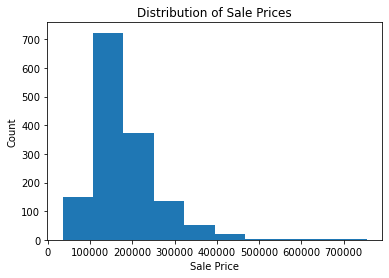

In [75]:
# checking for the distibution of our target variable
plt.hist('saleprice',data=df_train)
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Distribution of Sale Prices')

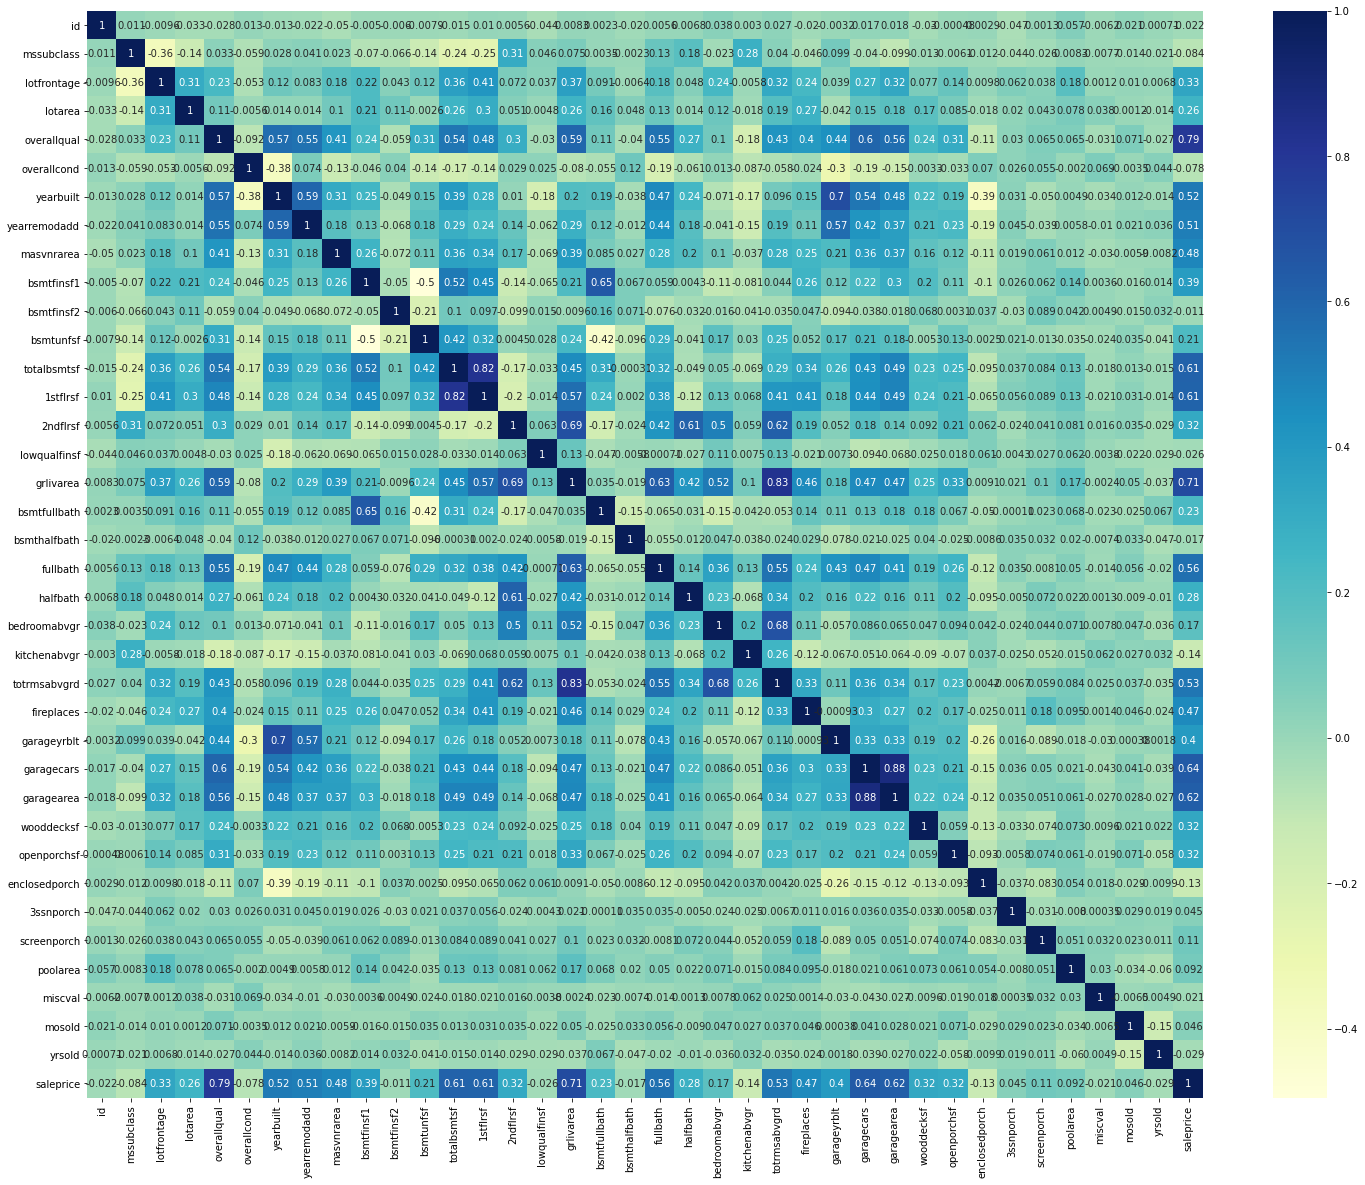

In [76]:
# using a heatmap to check for the variables with the higest corrolation with the target variable
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(),cmap="YlGnBu",annot=True);

From the corrolation plot above, we can see that the features that have the greatest corrolation with sales price are: 
* overallqual - Rates the overall material and finish of the house
* grlivarea - Above grade (ground) living area square feet
* garagecars - Size of garage in car capacity
* garagearea - Size of garage in square feet
* totalbsmtsf - Total square feet of basement area

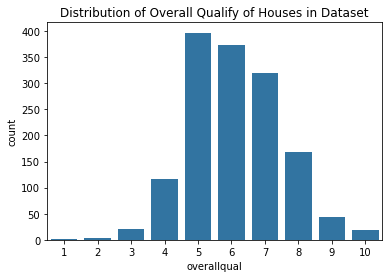

In [77]:
# checking the distribution in the overallqual column
sns.countplot(x='overallqual',data=df_train,color=col)
plt.title('Distribution of Overall Qualify of Houses in Dataset');

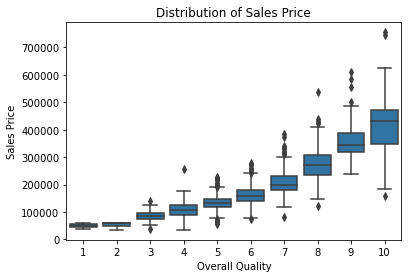

In [78]:
# using a boxplot to see distrubution of houseprices among different overallqual values
sns.boxplot(y='saleprice',x='overallqual',data=df_train,color=col)
plt.title('Distribution of Sales Price')
plt.ylabel('Sales Price')
plt.xlabel('Overall Quality');

We can see that sales price increase with higher overall quality of houses in the dataset.

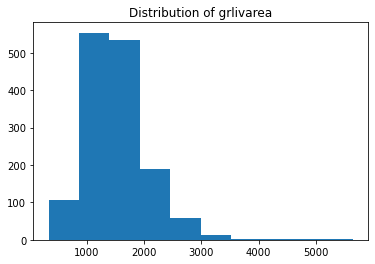

In [79]:
#checking the distribution of grlivarea in the dataset
plt.hist(x='grlivarea',data=df_train)
plt.title('Distribution of grlivarea');

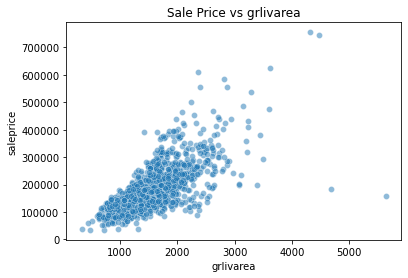

In [80]:
#using a scatter plot to check the realtionship between grlivarea and sales price
sns.scatterplot(x='grlivarea',y='saleprice',data=df_train,alpha=0.5)
plt.title('Sale Price vs grlivarea');

We can see that, apart from a few outliers, saleprice increases as grlivearea increases.

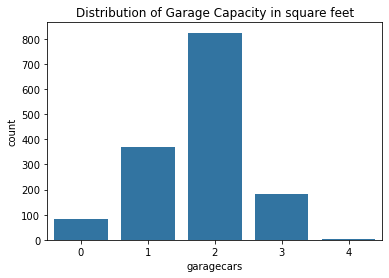

In [81]:
# checking distribution of garagecars capacity in the dataset
sns.countplot(x='garagecars',data=df_train,color=col)
plt.title('Distribution of Garage Capacity in square feet');

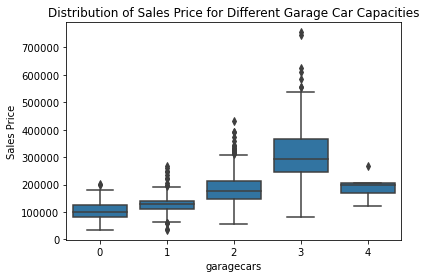

In [82]:
# using a boxplot to see distrubution of houseprices among different overallqual values
sns.boxplot(y='saleprice',x='garagecars',data=df_train,color=col)
plt.title('Distribution of Sales Price for Different Garage Car Capacities')
plt.ylabel('Sales Price');

Apart from houses with 4 car capacity, sales price of houses in the dataset increase with increasing car capacity.

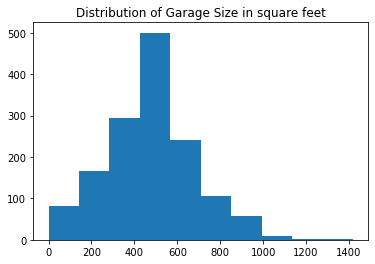

In [83]:
# checking distribution of garagearea size in the dataset
plt.hist(x='garagearea',data=df_train,color=col)
plt.title('Distribution of Garage Size in square feet');

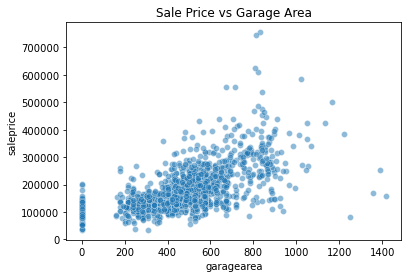

In [84]:
#using a scatter plot to check the realtionship between garagearea and sales price
sns.scatterplot(x='garagearea',y='saleprice',data=df_train,alpha=0.5)
plt.title('Sale Price vs Garage Area');

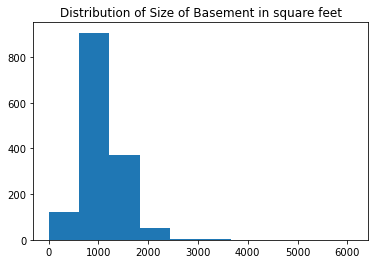

In [85]:
# checking distribution of totalbsmtsf size in the dataset
plt.hist(x='totalbsmtsf',data=df_train,color=col)
plt.title('Distribution of Size of Basement in square feet');

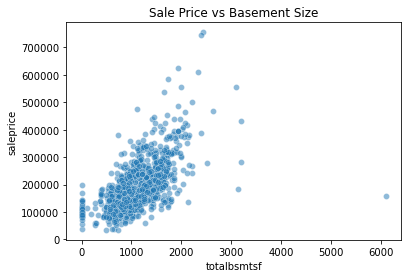

In [86]:
#using a scatter plot to check the realtionship between totalbsmtsf and sales price
sns.scatterplot(x='totalbsmtsf',y='saleprice',data=df_train,alpha=0.5)
plt.title('Sale Price vs Basement Size');

Sale price has been observed to increase with an increase in the size of the basement and size of the garage.

## Insights from Exploratoty Analysis

* totalbsmtsf, garagearea, garagecars, grlivarea and overallqual are the features that have the highest corolation with our target variable
* Sales price increase with higher overall quality of houses in the dataset.
* Apart from a few outliers, saleprice increases as grlivearea increases.
* Apart from houses with 4 car capacity, sales price of houses in the dataset increase with increasing car capacity.
* Sale price has been observed to increase with an increase in the size of the basement and size of the garage.

## Training and Evaluation of Regression Modles